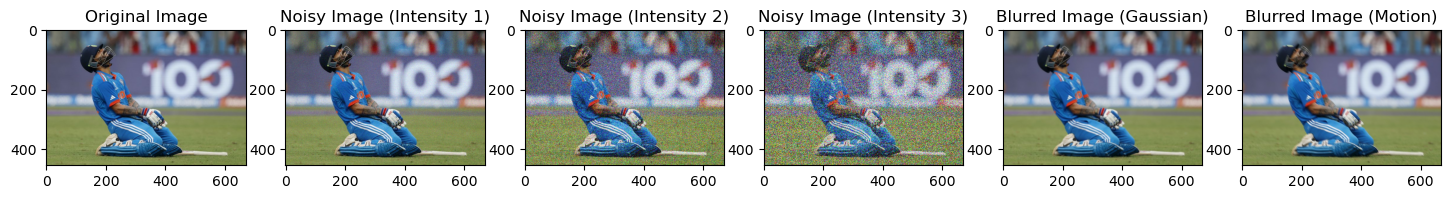

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from lpips import LPIPS

def calculate_lpips(img1, img2):
    lpips_model = LPIPS(net='alex')
    lpips_value = lpips_model.forward(img1, img2).item()
    return lpips_value

# Load the image
image = cv2.imread('80.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Add noise to the image
noise_intensity_1 = 10
noise_intensity_2 = 50
noise_intensity_3 = 100

noisy_image_1 = image + np.random.normal(0, noise_intensity_1, image.shape)
noisy_image_2 = image + np.random.normal(0, noise_intensity_2, image.shape)
noisy_image_3 = image + np.random.normal(0, noise_intensity_3, image.shape)

noisy_image_1 = np.clip(noisy_image_1, 0, 255).astype(np.uint8)
noisy_image_2 = np.clip(noisy_image_2, 0, 255).astype(np.uint8)
noisy_image_3 = np.clip(noisy_image_3, 0, 255).astype(np.uint8)

blurred_image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

kernel_motion = np.array([[1, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 1, 0],
                         [0, 0, 0, 0, 1]]) / 5
blurred_image_motion = cv2.filter2D(image, -1, kernel_motion)

blurred_image_defocus = cv2.GaussianBlur(image, (15, 15), 10)

plt.figure(figsize=(18, 6))

plt.subplot(1, 6, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 6, 2)
plt.imshow(noisy_image_1)
plt.title('Noisy Image (Intensity 1)')

plt.subplot(1, 6, 3)
plt.imshow(noisy_image_2)
plt.title('Noisy Image (Intensity 2)')

plt.subplot(1, 6, 4)
plt.imshow(noisy_image_3)
plt.title('Noisy Image (Intensity 3)')

plt.subplot(1, 6, 5)
plt.imshow(blurred_image_gaussian)
plt.title('Blurred Image (Gaussian)')

plt.subplot(1, 6, 6)
plt.imshow(blurred_image_motion)
plt.title('Blurred Image (Motion)')

plt.show()


## PSNR FOR NOISY-1

In [42]:
def calculate_psnr(original, noisy):
    mse = np.mean((original - noisy) ** 2)
    max_pixel_value = 255.0  
    psnr = 10 * np.log10((max_pixel_value ** 2) / mse)
    return psnr

psnr_value1 = calculate_psnr(original_image, noisy_image_1)
print(psnr_value1)

psnr_value2 = calculate_psnr(original_image, noisy_image_2)
print(psnr_value2)

psnr_value3 = calculate_psnr(original_image, noisy_image_3)
print(psnr_value3)


28.438670367804235
27.919645588667205
27.914375355190245


## SSIM for NOISY

In [43]:
from skimage.metrics import structural_similarity as ssim

win_size = 3  
ssim_value1, _ = ssim(original_image, noisy_image_1, win_size=win_size, full=True)
print(f"SSIM1: {ssim_value1}")

ssim_value2, _ = ssim(original_image, noisy_image_2, win_size=win_size, full=True)
print(f"SSIM2: {ssim_value2}")

ssim_value3, _ = ssim(original_image, noisy_image_3, win_size=win_size, full=True)
print(f"SSIM3: {ssim_value3}")

SSIM1: -0.21861076333252774
SSIM2: -0.09602890345722238
SSIM3: -0.04505802266213455


## LPIPS FOR NOISY

In [44]:
import lpips
import torch
import numpy as np

loss_fn_alex = lpips.LPIPS(net='alex')

original_image_tensor = torch.from_numpy(original_image).permute(2, 0, 1).float()
noisy_image_tensor1 = torch.from_numpy(noisy_image_1).permute(2, 0, 1).float()

lpips_value1 = loss_fn_alex(original_image_tensor, noisy_image_tensor1).item()
print(f"LPIPS1: {lpips_value1}")

original_image_tensor = torch.from_numpy(original_image).permute(2, 0, 1).float()
noisy_image_tensor2 = torch.from_numpy(noisy_image_2).permute(2, 0, 1).float()

lpips_value2 = loss_fn_alex(original_image_tensor, noisy_image_tensor2).item()
print(f"LPIPS2: {lpips_value2}")

original_image_tensor = torch.from_numpy(original_image).permute(2, 0, 1).float()
noisy_image_tensor3= torch.from_numpy(noisy_image_3).permute(2, 0, 1).float()

lpips_value3 = loss_fn_alex(original_image_tensor, noisy_image_tensor3).item()
print(f"LPIPS3: {lpips_value3}")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\Karthick NG\anaconda3\lib\site-packages\lpips\weights\v0.1\alex.pth
LPIPS1: 0.27150866389274597
LPIPS2: 0.7910869121551514
LPIPS3: 1.0473618507385254


## PSNR,SSIM,LPIPS for Blurred images

In [45]:

blurred_image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)
psnr_value_gaussian = calculate_psnr(original_image, blurred_image_gaussian)
print(f"PSNR for Gaussian Blur: {psnr_value_gaussian}")

ssim_value_gaussian, _ = ssim(original_image, blurred_image_gaussian, win_size=win_size, full=True)
print(f"SSIM for Gaussian Blur: {ssim_value_gaussian}")

kernel_motion = np.array([[1, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 1, 0],
                         [0, 0, 0, 0, 1]]) / 5
blurred_image_motion = cv2.filter2D(image, -1, kernel_motion)
psnr_value_motion = calculate_psnr(original_image, blurred_image_motion)
print(f"PSNR for Motion Blur: {psnr_value_motion}")

ssim_value_motion, _ = ssim(original_image, blurred_image_motion, win_size=win_size, full=True)
print(f"SSIM for Motion Blur: {ssim_value_motion}")

lpips_value_motion = loss_fn_alex(original_image_tensor, torch.from_numpy(blurred_image_motion).permute(2, 0, 1).float()).item()
print(f"LPIPS for Motion Blur: {lpips_value_motion}")


PSNR for Gaussian Blur: 29.3829685604996
SSIM for Gaussian Blur: -0.25201680350285416
PSNR for Motion Blur: 29.301728806840597
SSIM for Motion Blur: -0.2581928234620671
LPIPS for Motion Blur: 0.23793332278728485
